In [1]:
import os
import sys
HOME = os.path.abspath('..')
sys.path.append(HOME)
os.chdir(HOME)
import torchvision
import dlib
from PIL import Image
from imutils import face_utils
from src.data.dataprep_mediapipe import *
from src.data.imgutils import *
from src.features.features_extractors_mediapipe import *
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/raw/FASTr_DATA_2022-02-18_1149.csv')

#df = df.iloc[5:,:]

In [4]:
df.melt(id_vars = ['b_ground_truth','e_ground_truth','f_ground_truth','a_ground_truth','s_ground_truth_2'],
        value_vars=['diagnosis'])

,b_ground_truth,e_ground_truth,f_ground_truth,a_ground_truth,s_ground_truth_2,variable,value
0,NaN,NaN,NaN,NaN,NaN,diagnosis,NaN
1,NaN,NaN,NaN,NaN,NaN,diagnosis,1.0
2,0.0,0.0,1.0,1.0,1.0,diagnosis,1.0
3,NaN,0.0,1.0,1.0,1.0,diagnosis,1.0
4,NaN,0.0,0.0,0.0,0.0,diagnosis,1.0
...,...,...,...,...,...,...,...
70,NaN,NaN,NaN,NaN,NaN,diagnosis,0.0
71,0.0,0.0,1.0,1.0,0.0,diagnosis,1.0
72,0.0,0.0,1.0,0.0,1.0,diagnosis,1.0
73,NaN,NaN,NaN,NaN,NaN,diagnosis,0.0


In [61]:
deficits = ['b_ground_truth','e_ground_truth','f_ground_truth','a_ground_truth','s_ground_truth_2']
df.groupby('diagnosis')[deficits].mean()

,b_ground_truth,e_ground_truth,f_ground_truth,a_ground_truth,s_ground_truth_2
diagnosis,,,,,
0.0,NaN,NaN,NaN,NaN,NaN
1.0,0.688889,0.106383,0.659574,0.893617,0.382979


In [8]:
df.loc[~df['f_ground_truth'].isna(),['f_ground_truth','diagnosis']]

f_ground_truth    0.66
diagnosis         1.00
dtype: float64

In [62]:
left_arm_cols = [i for i in df.columns if 'l_lap' in i]
right_arm_cols = [i for i in df.columns if 'r_lap' in i]
arm_cols = right_arm_cols+left_arm_cols

In [63]:
df[arm_cols] = df[arm_cols].replace(0,np.nan)

In [64]:
df['l_lap_mean'] = df[left_arm_cols].mean(axis=1)
df['r_lap_mean'] = df[right_arm_cols].mean(axis=1)

In [71]:
df['lap_mean_abs_diff']=(df['r_lap_mean']-df['l_lap_mean']).abs()

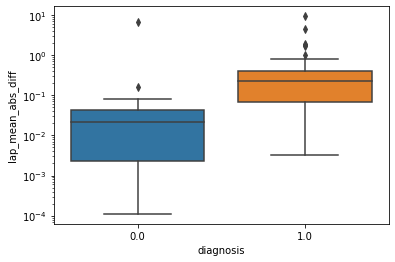

In [76]:
sns.boxplot(data = df,y ='lap_mean_abs_diff',x ='diagnosis')
plt.yscale('log')

In [99]:
df.loc[df['diagnosis']==0,'lap_mean_abs_diff'].quantile(0.7)

0.035199999999999995

In [114]:
th=0.045
df.loc[df['lap_mean_abs_diff']>th,'pred']=1
df.loc[df['lap_mean_abs_diff']<=th,'pred']=0

In [115]:
(df['diagnosis']==df['pred']).mean()

0.6428571428571429

(0.0, 2.0)

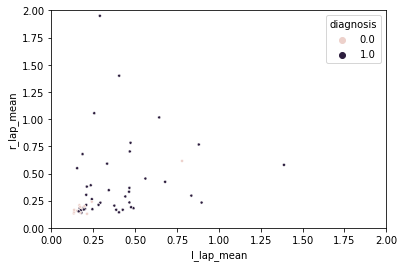

In [68]:
sns.scatterplot(data = df,x ='l_lap_mean',y ='r_lap_mean' ,marker='.',hue = 'diagnosis')
plt.xlim(0,2)
plt.ylim(0,2)